In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

ROWS = 20000

# Generate CGPA between 4.0 and 10.0
cgpa = np.random.normal(loc=7.0, scale=0.6, size=ROWS)
cgpa = np.clip(cgpa, 4.0, 10.0)
cgpa = np.round(cgpa, 2)

# Generate package with correlation
noise = np.random.normal(0, 1.5, ROWS)
package = 1.5 * cgpa + noise
package = np.clip(package, 2, 40)
package = np.round(package, 2)

# Add outliers (top 1%)
outlier_count = int(0.01 * ROWS)
indices = np.random.choice(ROWS, outlier_count, replace=False)
package[indices] += np.random.uniform(10, 20, outlier_count)

df = pd.DataFrame({
    "cgpa": cgpa,
    "package_lpa": package
})

# Save to CSV
df.to_csv("cgpa_package_dataset.csv", index=False)

print(df.head())
print("\nRows:", len(df))


   cgpa  package_lpa
0  7.30        11.47
1  6.92        10.80
2  7.39         9.68
3  7.91        12.73
4  6.86         8.05

Rows: 20000


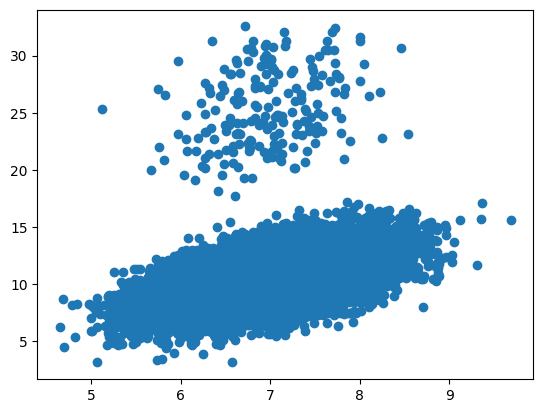

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['package_lpa'])

In [4]:
x = df.iloc[:, 0 : 1]
y = df.iloc[:, -1]

In [5]:
x

,cgpa
0,7.30
1,6.92
2,7.39
3,7.91
4,6.86
...,...
19995,7.23
19996,7.83
19997,7.23
19998,8.03


In [6]:
y

,package_lpa
0,11.47
1,10.80
2,9.68
3,12.73
4,8.05
...,...
19995,12.52
19996,12.14
19997,11.77
19998,13.27


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2 ,random_state= 42)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

lr.fit(x_train, y_train)


LinearRegression()

In [10]:
lr.predict(x_test)

array([10.43901089, 10.25624095, 10.98732073, ..., 11.23101398,
        9.63177697, 11.06347487])

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = lr.predict(x_test)

print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 score: 0.1753926123775118
MAE: 1.3299031615261858
MSE: 4.508096836740599


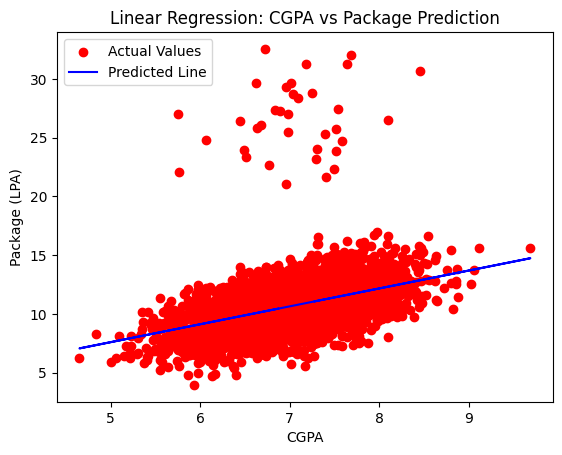

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, color='red', label='Actual Values')
plt.plot(x_test, y_pred, color='blue', label='Predicted Line')
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('Linear Regression: CGPA vs Package Prediction')
plt.legend()
plt.show()

In [13]:
m = lr.coef_
b = lr.intercept_

# y = mx + b